In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Concrete Slab
file_list = [
    "results/concreteslab_vamp/",
    "results/concreteslab_clf/",
]

file_labels = [
    "Vamp Prior",
    "Clf Prior",
]


training_step = "train_savefile.npz"
val_true_recon = {}
val_recon = {} 
val_l1 = {} 
val_true_l1 = {}
val_kl_loss = {} 
coeff_est = {} 
coeff_true = {}
num_true_supp = {}
num_redundant_supp = {}
est_active_coeff = {}
true_active_coeff = {}
classification_acc = {}

In [12]:
for idx, file in enumerate(file_list):
    data_file = np.load(file + training_step)
    val_true_recon[file_labels[idx]] = data_file['val_true_recon']
    val_recon[file_labels[idx]] = data_file['val_recon']
    val_l1[file_labels[idx]] = data_file['val_l1']
    val_true_l1[file_labels[idx]] = data_file['val_true_l1']
    val_kl_loss[file_labels[idx]] = data_file['val_kl_loss']
    coeff_est[file_labels[idx]] = data_file['coeff_est']
    coeff_true[file_labels[idx]] = data_file['coeff_true']
    num_true_supp[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))
    num_redundant_supp[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))
    true_active_coeff[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))
    est_active_coeff[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))   
    classification_acc[file_labels[idx]] = np.zeros(len(coeff_true[file_labels[idx]]))    
 
    for i in range(len(coeff_true[file_labels[idx]])):
        for j in range(coeff_true[file_labels[idx]].shape[1]):
            true_sup = np.nonzero(coeff_true[file_labels[idx]][i, j])[0]
            est_sup = np.nonzero(coeff_est[file_labels[idx]][i, j])[0]
            missed_support = np.setdiff1d(true_sup, est_sup)
            excess_support = np.setdiff1d(est_sup, true_sup)
            true_active_coeff[file_labels[idx]][i] += len(true_sup) / coeff_true[file_labels[idx]].shape[2]
            est_active_coeff[file_labels[idx]][i] += len(est_sup) / coeff_est[file_labels[idx]].shape[2]
            num_true_supp[file_labels[idx]][i] += (1 - (len(missed_support) / coeff_est[file_labels[idx]].shape[2]))
            num_redundant_supp[file_labels[idx]][i] += (len(excess_support) / coeff_est[file_labels[idx]].shape[2])
            classification_acc[file_labels[idx]][i] += (coeff_est[file_labels[idx]].shape[2] - len(missed_support) - len(excess_support)) 
        true_active_coeff[file_labels[idx]][i] /= coeff_true[file_labels[idx]].shape[1]
        est_active_coeff[file_labels[idx]][i] /= coeff_est[file_labels[idx]].shape[1]
        num_true_supp[file_labels[idx]][i] /= coeff_true[file_labels[idx]].shape[1]
        num_redundant_supp[file_labels[idx]][i] /= coeff_est[file_labels[idx]].shape[1]
        classification_acc[file_labels[idx]][i] /= (coeff_est[file_labels[idx]].shape[1] * coeff_est[file_labels[idx]].shape[2])

    #stat_file = np.load(file + 'encoder_statistics.npz')
    #multi_info[file_labels[idx]] = stat_file['multi_info']
    #posterior_collapse[file_labels[idx]] = stat_file['posterior_collapse']
    #coeff_collapse[file_labels[idx]] = stat_file['coeff_collapse']    
    #stat_step[file_labels[idx]] = stat_file['load_list']
    #stat_step[file_labels[idx]] = list(range(0, 299, 20)) + [299]

BadZipFile: Bad CRC-32 for file 'coeff_est.npy'

KeyError: 'Vamp Prior'

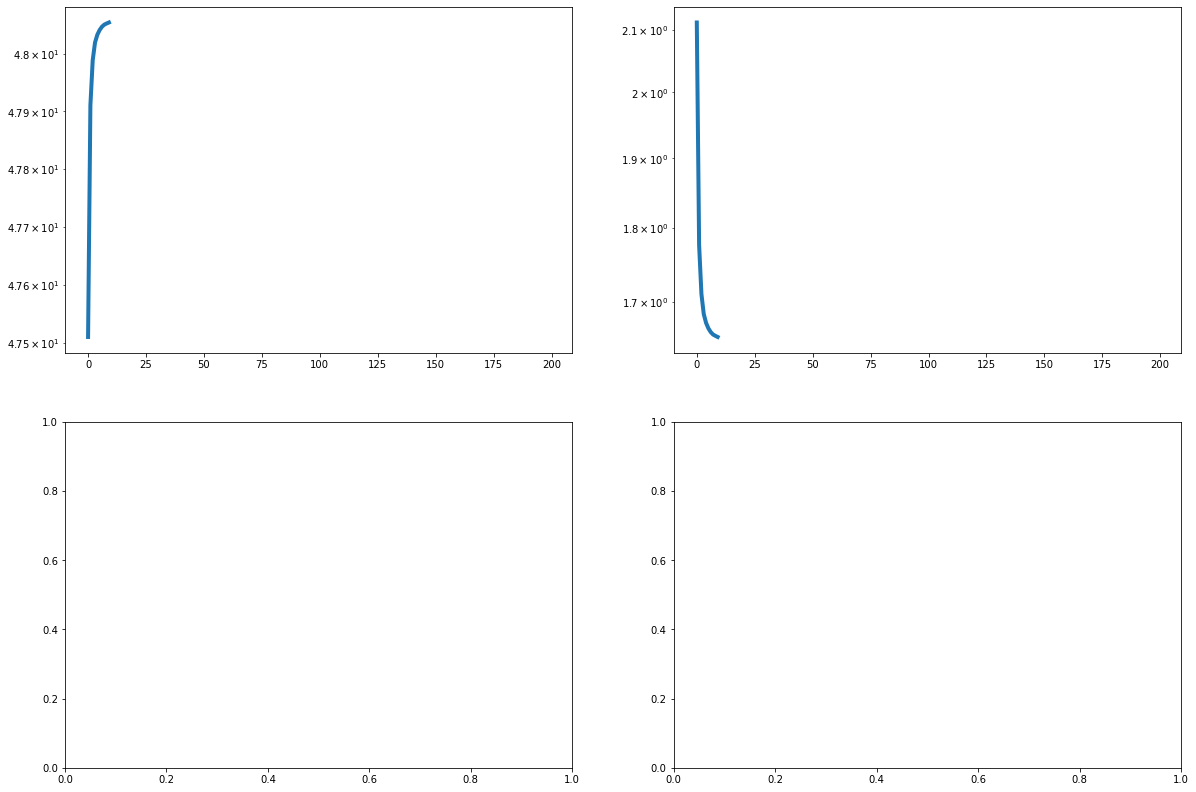

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for idx, label in enumerate(file_labels):
    if idx == 0:
        ax[0, 0].semilogy(val_true_recon[label], linewidth=4, label="FISTA")
        ax[0, 1].semilogy(val_true_l1[label], linewidth=4, label="FISTA")
        ax[1, 0].plot(np.zeros(len(coeff_est[label])), linewidth=4, label="FISTA")
        ax[1, 1].semilogy(np.abs(coeff_true[label]).sum(axis=(1, 2)) / np.count_nonzero(coeff_true[label], axis=(1, 2)), linewidth=4, label="FISTA")

    ax[0, 0].semilogy(val_recon[label], linewidth=4, label=label)
    ax[0, 1].semilogy(val_l1[label], linewidth=4, label=label)
    ax[1, 0].semilogy(np.linalg.norm(coeff_est[label] - coeff_true[label], axis=-1).mean(axis=1), linewidth=4, label=label)
    ax[1, 1].semilogy(np.abs(coeff_est[label]).sum(axis=(1, 2)) / np.count_nonzero(coeff_est[label], axis=(1, 2)), linewidth=4, label=label)

ax[0, 0].legend(fontsize=14)
ax[0, 0].set_title("Validation Recon Loss", fontsize=14)
ax[0, 0].set_xlabel("Epoch", fontsize=14)
ax[0, 0].set_ylabel("Log Loss", fontsize=14)

#ax[0, 1].legend(fontsize=14)
ax[0, 1].set_title("Validation L1 Loss", fontsize=14)
ax[0, 1].set_xlabel("Epoch", fontsize=14)
ax[0, 1].set_ylabel("Log Loss", fontsize=14)

#ax[1, 0].legend(fontsize=14)
ax[1, 0].set_title("L2 Distance with True Coefficients", fontsize=14)
ax[1, 0].set_xlabel("Epoch", fontsize=14)
ax[1, 0].set_ylabel("Log ||c^* - c||_2", fontsize=14)

#ax[1, 1].legend(fontsize=14)
ax[1, 1].set_title("Mean Absolute Value for Active Coefficients", fontsize=14)
ax[1, 1].set_xlabel("Epoch", fontsize=14)
ax[1, 1].set_ylabel("Log Mean Value", fontsize=14)

(-0.1, 1.1)

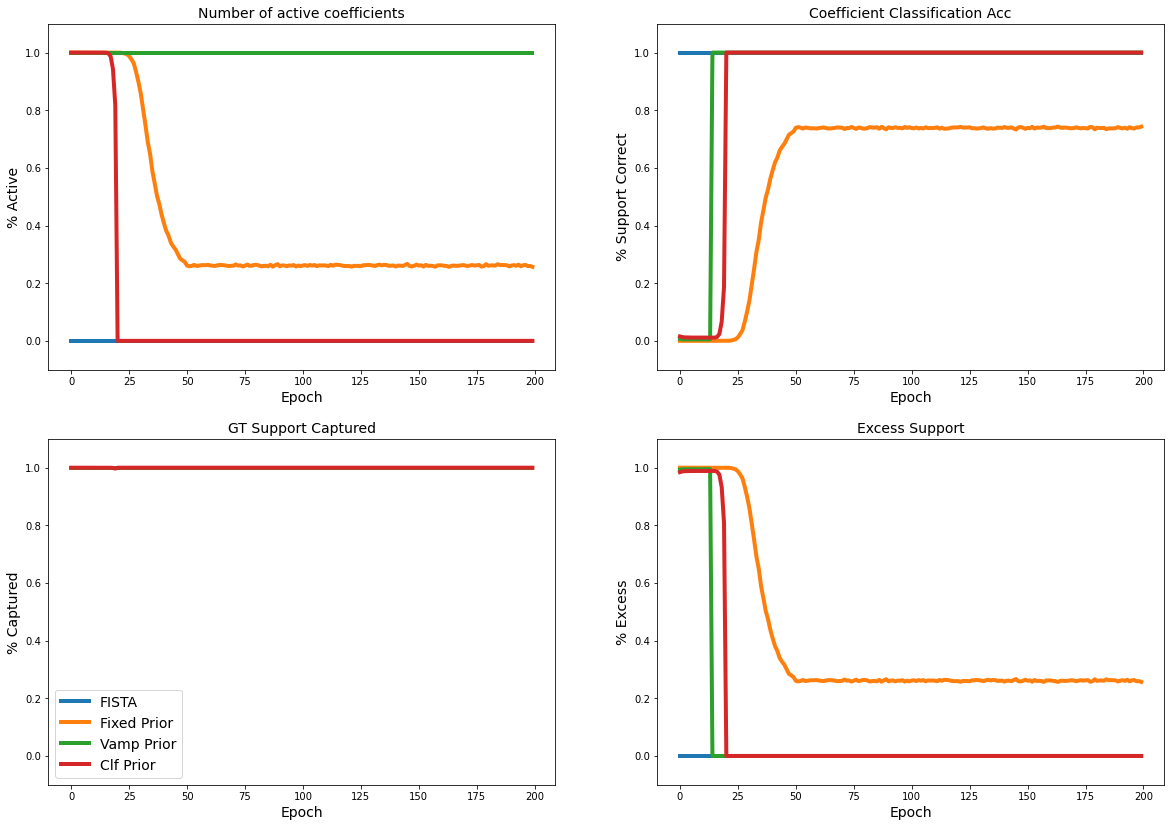

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for idx, label in enumerate(file_labels):
    if idx == 0:
        ax[0, 0].plot(true_active_coeff[label], linewidth=4, label="FISTA")
        ax[0, 1].plot(np.ones(len(classification_acc[label])), linewidth=4, label="FISTA")
        ax[1, 0].plot(np.ones(len(num_true_supp[label])), linewidth=4, label="FISTA")
        ax[1, 1].plot(np.zeros(len(num_true_supp[label])), linewidth=4, label="FISTA")        
    ax[0, 0].plot(est_active_coeff[label], linewidth=4, label=label)
    ax[0, 1].plot(classification_acc[label], linewidth=4, label=label)
    ax[1, 0].plot(num_true_supp[label], linewidth=4, label=label)
    ax[1, 1].plot(num_redundant_supp[label], linewidth=4, label=label)

#ax[0, 0].legend(fontsize=14)
ax[0, 0].set_title("Number of active coefficients", fontsize=14)
ax[0, 0].set_xlabel("Epoch", fontsize=14)
ax[0, 0].set_ylabel("% Active", fontsize=14)
ax[0, 0].set_ylim([-.1, 1.1])

#ax[0, 1].legend(fontsize=14)
ax[0, 1].set_title("Coefficient Classification Acc", fontsize=14)
ax[0, 1].set_xlabel("Epoch", fontsize=14)
ax[0, 1].set_ylabel("% Support Correct", fontsize=14)
ax[0, 1].set_ylim([-.1, 1.1])

ax[1, 0].legend(fontsize=14)
ax[1, 0].set_title("GT Support Captured", fontsize=14)
ax[1, 0].set_xlabel("Epoch", fontsize=14)
ax[1, 0].set_ylabel("% Captured", fontsize=14)
ax[1, 0].set_ylim([-.1, 1.1])

#ax[1, 1].legend(fontsize=14)
ax[1, 1].set_title("Excess Support", fontsize=14)
ax[1, 1].set_xlabel("Epoch", fontsize=14)
ax[1, 1].set_ylabel("% Excess", fontsize=14)
ax[1, 1].set_ylim([-.1, 1.1])


In [3]:
import re
import numpy as np
import json
import os
from types import SimpleNamespace

import torch
import torch.nn.functional as F

from model.vi_encoder import VIEncoder
from model.scheduler import CycleScheduler

training_step = "train_savefile.npz"
base_run = "results/laplacian_fixed/"
load_list = [int(re.search(r'epoch([0-9].*).pt', f)[1]) for f in os.listdir(base_run) if re.search(r'epoch([0-9].*).pt', f)]
epoch_load_list = np.sort(load_list)

with open(base_run + "config.json") as json_data:
    config_data = json.load(json_data)
train_args = SimpleNamespace(**config_data['train'])
solver_args = SimpleNamespace(**config_data['solver'])

code_count = 40000
data_file = f"data/imagepatches_12.np"
if os.path.exists(data_file):
    with open(data_file, 'rb') as f:
        data_patches = np.load(f)
        val_patches = np.load(f)

train_idx = np.linspace(1, data_patches.shape[0] - 1, code_count, dtype=int)
random_images = data_patches[train_idx, :, :].reshape(-1, 12**2)
random_images = random_images / np.linalg.norm(random_images, axis=1)[:, None]    
data_file = np.load(base_run + training_step)

In [8]:
temp = 1e-1
q_z_list = []
p_z_list = []
logscale_list = []
shift_list = []
z_list = []

for idx, method in enumerate(epoch_load_list):
    if method != 0:
        continue

    np.random.seed(train_args.seed)
    torch.manual_seed(train_args.seed)

    #dictionary = data_file['phi'][int(method)]
    dictionary = np.random.randn(train_args.patch_size ** 2, train_args.dict_size)
    dictionary /= np.sqrt(np.sum(dictionary ** 2, axis=0))
    encoder = VIEncoder(train_args.patch_size, train_args.dict_size, solver_args).to('cuda:1')
    encoder.load_state_dict(torch.load(base_run + f"encoderstate_epoch{method}.pt")['model_state'])
    
    vi_opt = torch.optim.SGD(encoder.parameters(), lr=1e-3, momentum=0.9, nesterov=True)
    vi_scheduler = CycleScheduler(vi_opt, 1e-3, 
                                  n_iter=(train_args.epochs * random_images.shape[0]) // train_args.batch_size,
                                  momentum=None, warmup_proportion=0.05)
    for k in range(20):
        for i in range(random_images.shape[0] // train_args.batch_size):

            if solver_args.prior_distribution == "gaussian":
                pseudo_feat = encoder.enc(encoder.pseudo_inputs)
                pseudo_shift, pseudo_logscale =  encoder.shift(pseudo_feat), encoder.scale(pseudo_feat)

                patches = torch.tensor(random_images[torch.linspace(0, len(random_images), 1000, dtype=int)].reshape(1000, -1)).float().to('cuda:1')
                feat = encoder.enc(patches)
                shift, logscale = encoder.shift(feat), encoder.scale(feat)

                scale = torch.exp(0.5*logscale)
                eps = torch.randn_like(scale)
                if solver_args.threshold:
                    z = encoder.soft_threshold(eps*scale)
                    non_zero = torch.nonzero(z, as_tuple=True)  
                    z[non_zero] = shift[non_zero] + z[non_zero]

                log_p_z = -0.5 * (pseudo_logscale + torch.pow(z.unsqueeze(1) - pseudo_shift, 2 ) / (torch.exp(pseudo_logscale) + 1e-6))
                log_p_z = torch.logsumexp(log_p_z - np.log(solver_args.num_pseudo_inputs), dim=-2)
                log_q_z = -0.5 * (logscale + torch.pow(z - shift, 2 ) / (torch.exp(logscale) + 1e-6))

                print(f"Epoch {method + k} step {i}")
                print(f"Avg PI norm: {encoder.pseudo_inputs.data.norm(dim=-1).mean():.3E}")
                print(f"data min shift: {shift.min():.3E}, max shift: {shift.max():.3E}, avg shift: {shift.mean():.3E}")
                print(f"data min scale: {logscale.min():.3E}, max scale: {logscale.max():.3E}, avg scale: {logscale.mean():.3E}")
                print(f"PI min shift: {pseudo_shift.min():.3E}, max shift: {pseudo_shift.max():.3E}, avg shift: {pseudo_shift.mean():.3E}")
                print(f"PI min scale: {pseudo_logscale.min():.3E}, max scale: {pseudo_logscale.max():.3E}, avg scale: {pseudo_logscale.mean():.3E}")
                print(f"Avg z norm: {z.norm(dim=-1).mean():.3E}, z_min: {z.min():.3E}, z_max: {z.max():.3E}")
                print(f"log p_z: {log_p_z.mean():.3E}, log_q_z: {log_q_z.mean():.3E}")
            elif solver_args.prior_distribution == "laplacian":
                patches = torch.tensor(random_images[torch.linspace(0, len(random_images), 1000, dtype=int)].reshape(1000, -1)).float().to('cuda:1')
                feat = encoder.enc(patches)
                shift, logscale = encoder.shift(feat), encoder.scale(feat)
                
                scale = torch.exp(logscale)
                u = torch.rand_like(logscale)
                eps = -scale * torch.sign(u) * torch.log((1.0-2.0*torch.abs(u)).clamp(min=1e-10)) 
                if solver_args.threshold:
                    z = encoder.soft_threshold(eps)
                    non_zero = torch.nonzero(z, as_tuple=True)  
                    z[non_zero] = shift[non_zero] + z[non_zero]
                else:
                    z = shift + eps

                print(f"Epoch {method + k} step {i}")
                print(f"data min shift: {shift.min():.3E}, max shift: {shift.max():.3E}, avg shift: {shift.mean():.3E}")
                print(f"data min scale: {logscale.min():.3E}, max scale: {logscale.max():.3E}, avg scale: {logscale.mean():.3E}")
                print(f"Avg z norm: {z.norm(dim=-1).mean():.3E}, z_min: {z.min():.3E}, z_max: {z.max():.3E}")

            elif solver_args.prior_distribution == "concreteslab":
                pseudo_feat = encoder.enc(encoder.pseudo_inputs)
                pseudo_shift, pseudo_logscale, pseudo_logspike =  encoder.shift(pseudo_feat), encoder.scale(pseudo_feat), -F.relu(-encoder.spike(pseudo_feat))
                pseudo_scale, pseudo_spike = (0.5 * pseudo_logscale).exp(), torch.clamp(pseudo_logspike.exp(), 1e-3, 1.0 - 1e-3)

                patches = torch.tensor(random_images[torch.linspace(0, len(random_images), 1000, dtype=int)].reshape(1000, -1)).float().to('cuda:1')
                feat = encoder.enc(patches)
                shift, logscale, logspike = encoder.shift(feat), encoder.scale(feat), -F.relu(-encoder.spike(feat))
                scale, spike = (0.5 * logscale).exp(), torch.clamp(logspike.exp(), 1e-3, 1.0 - 1e-3)

                std = torch.exp(0.5*logscale)
                eps = torch.randn_like(std)
                gaussian = eps.mul(std).add_(shift)
                eta = torch.rand_like(std)
                u = torch.log(eta) - torch.log(1 - eta)
                selection = torch.sigmoid((u + logspike) / temp)
                z = selection * gaussian

                log_p_z = -0.5 * (pseudo_logscale[None] + torch.pow(z.unsqueeze(1) - pseudo_shift[None], 2 ) / torch.exp(pseudo_logscale[None]))
                log_p_z = spike *  torch.logsumexp(log_p_z - torch.log(solver_args.num_pseudo_inputs / pseudo_spike[None]), dim=-2)
                
                log_q_z = spike * -0.5 * (logscale + torch.pow(z - shift, 2 ) / torch.exp(logscale))

                pos_spike_kl = spike*logspike
                neg_spike_kl = (1 - spike) * torch.log(1 - spike) - (1 - spike) * torch.log((1 - pseudo_spike).mean(dim=-2))

                avg_pseudo_spike = pseudo_spike.mean(dim=-1)
                pseudo_prior = pseudo_spike.shape[1] * (avg_pseudo_spike*torch.log(avg_pseudo_spike/solver_args.spike_prior) + 
                                    (1 - avg_pseudo_spike)*torch.log((1 - avg_pseudo_spike)/(1 - solver_args.spike_prior)))

                print(f"Epoch {method + k} step {i}")
                print(f"Avg PI norm: {encoder.pseudo_inputs.data.norm(dim=-1).mean():.3E}")
                print(f"data min shift: {shift.min():.3E}, max shift: {shift.max():.3E}, avg shift: {shift.mean():.3E}")
                print(f"data min scale: {scale.min():.3E}, max scale: {scale.max():.3E}, avg scale: {scale.mean():.3E}")
                print(f"data min spike: {pseudo_spike.min():.3E}, max spike: {pseudo_spike.max():.3E}, avg spike: {pseudo_spike.mean():.3E}")
                print(f"PI min shift: {pseudo_shift.min():.3E}, max shift: {pseudo_shift.max():.3E}, avg shift: {pseudo_shift.mean():.3E}")
                print(f"PI min scale: {pseudo_scale.min():.3E}, max scale: {pseudo_scale.max():.3E}, avg scale: {pseudo_scale.mean():.3E}")
                print(f"PI min spike: {pseudo_spike.min():.3E}, max spike: {pseudo_spike.max():.3E}, avg spike: {pseudo_spike.mean():.3E}")
                print(f"Avg z norm: {z.norm(dim=-1).mean():.3E}, z_min: {z.min():.3E}, z_max: {z.max():.3E}")
                print(f"log p_z: {log_p_z.mean():.3E}, log_q_z: {log_q_z.mean():.3E}, pos spike kl: {pos_spike_kl.mean():.3E}, neg spike kl: {neg_spike_kl.mean():.3E}, pseudo prior: {pseudo_prior.mean():.3E}")

            #p_z_list.append(log_p_z.detach().cpu())
            #q_z_list.append(log_q_z.detach().cpu())
            logscale_list.append(logscale.detach().cpu())
            shift_list.append(shift.detach().cpu())
            z_list.append(z.detach().cpu())

            patches = random_images[i * train_args.batch_size:(i + 1) * train_args.batch_size].reshape(train_args.batch_size, -1).T

            # Infer coefficients
            patches_cu = torch.tensor(patches.T).float().to('cuda:1')
            dict_cu = torch.tensor(dictionary, device='cuda:1').float()
            iwae_loss, recon_loss, kl_loss, b_cu = encoder(patches_cu, dict_cu)
            print((b_cu @ dict_cu.T).mean())
            print(dict_cu.mean())
            print(f"iwae: {iwae_loss:.3E}, recon: {recon_loss:.3E}, kl: {kl_loss:.3E}")
            print()

            if torch.isnan(iwae_loss).any():
                break

            vi_opt.zero_grad()
            iwae_loss.backward()
            vi_opt.step()
            vi_scheduler.step()
        if torch.isnan(iwae_loss).any():
            break
    print()

Epoch 0 step 0
data min shift: -9.597E-02, max shift: 1.031E-01, avg shift: -4.308E-03
data min scale: -1.016E-01, max scale: 9.977E-02, avg scale: -1.860E-03
Avg z norm: 2.524E+02, z_min: -9.115E-02, z_max: 2.466E+01
tensor(-1.2812, device='cuda:1', grad_fn=<MeanBackward0>)
tensor(-0.0004, device='cuda:1')
iwae: 5.181E+02, recon: 4.403E+02, kl: 6.212E-01

Epoch 0 step 1
data min shift: -1.102E-01, max shift: 1.028E-01, avg shift: -5.226E-03
data min scale: -1.294E-01, max scale: 8.802E-02, avg scale: -1.234E-02
Avg z norm: 2.500E+02, z_min: -9.428E-02, z_max: 2.443E+01
tensor(-1.5670, device='cuda:1', grad_fn=<MeanBackward0>)
tensor(-0.0004, device='cuda:1')
iwae: 5.032E+02, recon: 4.268E+02, kl: 6.338E-01

Epoch 0 step 2
data min shift: -1.109E-01, max shift: 1.029E-01, avg shift: -5.272E-03
data min scale: -1.312E-01, max scale: 8.761E-02, avg scale: -1.292E-02
Avg z norm: 2.496E+02, z_min: -1.042E-01, z_max: 2.445E+01
tensor(-1.2896, device='cuda:1', grad_fn=<MeanBackward0>)
tensor

In [5]:
torch.set_printoptions(profile="full")
batch = q_z_list[-2].argmin(dim=-1)
val = q_z_list[-2][torch.arange(1000), batch].argmin()
feature = batch[val]

test_q_z = -0.5 * (logscale_list[-2][val] + torch.pow(z_list[-2][val] - shift_list[-2][val], 2 ) / (torch.exp(logscale_list[-2][val]) + 1e-6))

print(logscale_list[-2][:, feature].exp().mean())

print(torch.pow(z_list[-2][val] - shift_list[-2][val], 2 )[feature])
print(test_q_z[feature])
print(q_z_list[-2][val].min())
print(q_z_list[-2][val,feature])
print(logscale_list[-2][val, feature].exp())
print(shift_list[-2][val].min())
print(z_list[-2][val, feature])

tensor(4.1947e-13)
tensor(325.0958)
tensor(-1.6255e+08)
tensor(-1.6255e+08)
tensor(-1.6255e+08)
tensor(1.3062e-13)
tensor(-9.9215)
tensor(0.)
